# Effects of time and user information on trips duration

## Investigation Overview

In this investigation, I wanted to look at these features and see how it affect the trips duration. The main focus will be on the time information and the user information

## Dataset Overview

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. The columns have information about trip duration, member information, time information, and station information.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# loading data
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
# Drop the rows that contain missing values 
df.dropna(inplace = True)

In [4]:
# drop columns that has member_gender == 'Other'
df = df[df.member_gender != 'Other']

In [5]:
# Calculating members age. This data is from 2019, so I will calculate the age based on that year.
df['member_age'] = 2019 - df['member_birth_year']

In [6]:
# Correcting data types format

# converting start_time and end_time into DateTime.
df.start_time = pd.to_datetime(df['start_time'])
df.end_time = pd.to_datetime(df['end_time'])

# converting user_type and member_gender into category
df.user_type = df.user_type.astype('category')
df.member_gender = df.member_gender.astype('category')

In [7]:
# get start hour, start day, start month columns 
df['start_timeofday'] = df.start_time.dt.strftime('%H')
df['start_dayofweek'] = df.start_time.dt.strftime('%A')
df['start_month'] = df.start_time.dt.strftime('%B')

In [8]:
# Converting duration by seconds into duration by minutes.
df['duration_minute'] = df['duration_sec']/60 
# continuous variable

## Trips Duration Distribution
Most trips take less than 20 minutes.

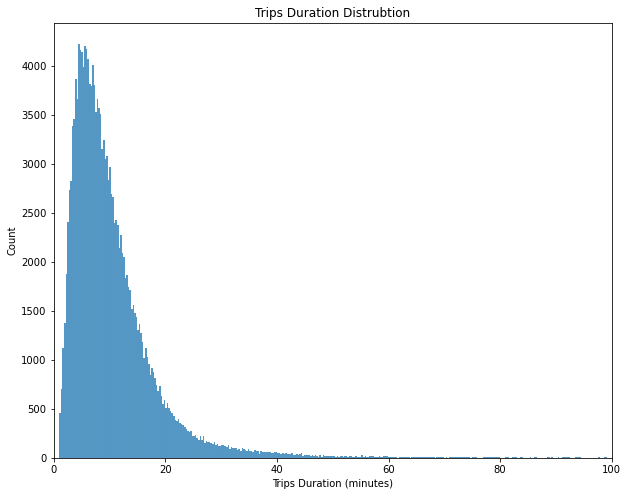

In [9]:
# Distribution of duration in minute 
plt.figure(figsize = [10, 8])

sb.histplot(data = df, x = 'duration_minute')

plt.xlabel('Trips Duration (minutes)')
plt.xlim((0, 100))
plt.title('Trips Duration Distrubtion');

In [10]:
# function to plot the distribution of categorical variable 
# since the countplot function show the counts of observations in each categorical bin using bars.
def countplot_prop(x = None, data = None, hue = None, ax = None, order = None, autopct = None, color = None):
    # plot the variable
    ax = sb.countplot(x = x, data = data, hue = hue, ax = ax, color = color, order = order)
    # names of x labels
    ax.set_xticklabels(ax.get_xticklabels())
    # plot title
    ax.set_title(x + " Distribution")
    # total number of data which used to get the proportion
    total = float(len(data))
    # if autopct equal to True, It will show the proportions of the data
    if autopct == True:
        # for loop to iterate on the patches
        for patch in ax.patches:
            # get the height of the patch which represents the number of observations.
            height = patch.get_height()
            # Put text on each patch with the proportion of the observations
            ax.text(patch.get_x()+patch.get_width()/2,height+4,'{:.2f}%'.format((height/total)*100),weight = 'bold',
                fontsize = 12,ha = 'center')

In [11]:
# convert start_timeofday, start_dayofweek, and start_month into ordered categorical types
time = {'start_timeofday':['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
        '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']
             ,'start_dayofweek':['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
             ,'start_month':['January', 'February', 'March', 'April', 'May', 'June',
                     'July', 'August', 'September', 'October', 'November', 'December']}
for unit in time:
    ordered = pd.api.types.CategoricalDtype(categories=time[unit], ordered=True)
    df[unit] = df[unit].astype(ordered)

In [12]:
df = df[df.duration_minute <= 60]
df = df[df.member_age <= 80]

## Duration vs. Age 
The relationship between members' age and trips duration is negative. 

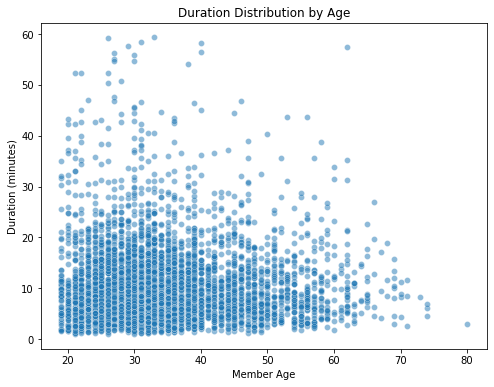

In [13]:
df_sample = df.sample(5000, replace = False)
plt.figure(figsize = [8, 6])
sb.scatterplot(data = df_sample, x = 'member_age', y = 'duration_minute', alpha = 0.5);
plt.xlabel('Member Age')
plt.ylabel('Duration (minutes)')
plt.title('Duration Distribution by Age');

## Duration by User Type and Start Time of Day
On all days, customers go on longer trips than subscribers, especially at midnight and midday.

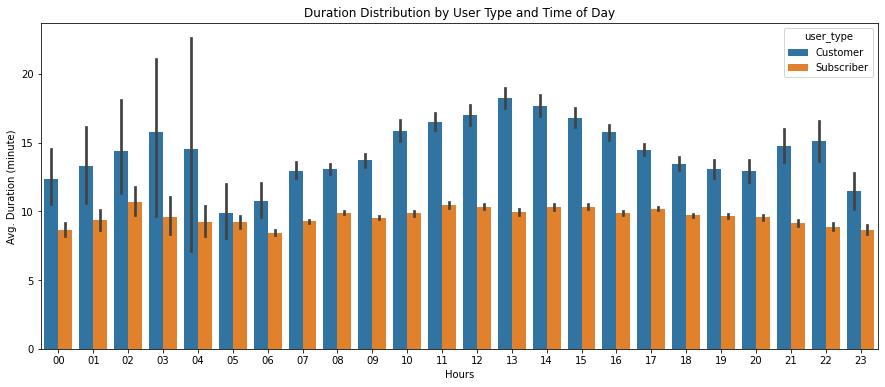

In [14]:
# Distribution of duration over times of the day
plt.figure(figsize = [15, 6])
sb.barplot(data = df, x = 'start_timeofday', y = 'duration_minute', hue = 'user_type')
plt.ylabel('Avg. Duration (minute)')
plt.xlabel('Hours');
plt.title('Duration Distribution by User Type and Time of Day');

## Duration by User Type and Days of the Week
The trip duration increases for customers on the weekends, but for subscribers, it is consistent during all days.

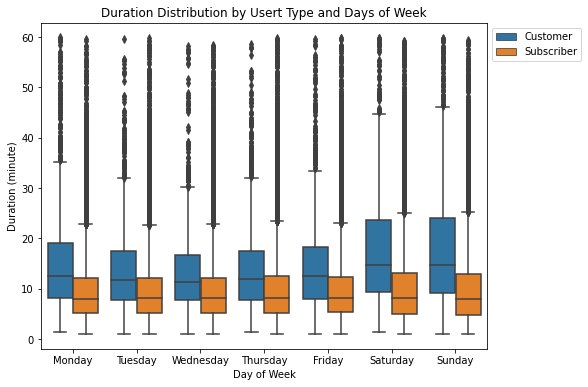

In [15]:
# Distribution of duration over days of the week
plt.figure(figsize = [8, 6])
sb.boxplot(data = df, x = 'start_dayofweek', y = 'duration_minute', hue = 'user_type')
plt.ylabel('Duration (minute)')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.xlabel('Day of Week');
plt.title('Duration Distribution by Usert Type and Days of Week');

## Duration by Gender and User Type
Females go on long-duration trips than males, no matter they are subscribers or customers.

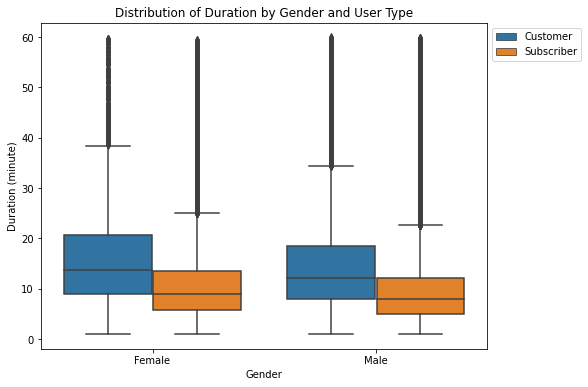

In [16]:
# Distribution of duration vs gender and user type 
plt.figure(figsize = [8, 6])
sb.boxplot(data = df, x = 'member_gender', y = 'duration_minute', hue = 'user_type')
plt.ylabel('Duration (minute)')
plt.xlabel('Gender');
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.title('Distribution of Duration by Gender and User Type');

## Age by User Type and Gender
From the graph, we got a reason for why females go on longer duration trips than males. Females are younger than males, and the relationship between duration and ages is negative.

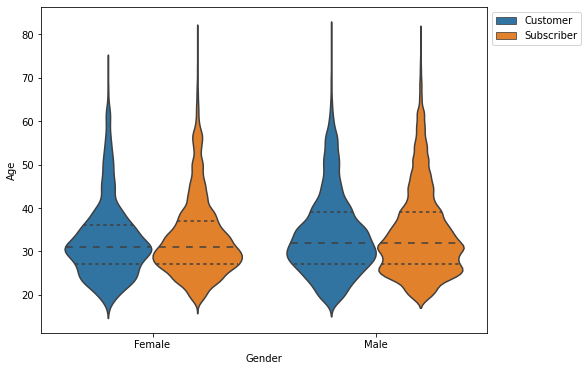

In [17]:
## Distribution of age vs. gender and user type

plt.figure(figsize = [8, 6])
sb.violinplot(data = df, x = 'member_gender', y = 'member_age', hue = 'user_type', inner = 'quartile')
plt.ylabel('Age')
plt.xlabel('Gender');
plt.legend(bbox_to_anchor=(1, 1), loc='upper left');

In [20]:
!jupyter nbconvert Data_Explanation.ipynb --to slides --no-input --post serve

[NbConvertApp] Converting notebook Data_Explanation.ipynb to slides
[NbConvertApp] Writing 804924 bytes to Data_Explanation.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\moham\Anaconda\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\moham\Anaconda\lib\site-packages\jupyter_core\application.py", line 254, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\moham\Anaconda\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\moham\Anaconda\lib\site-packages\nbconvert\nbconvertapp.py", line 350, in start
    self.convert_notebooks()
  File "C:\Users\moham\Anaconda\lib\site-packages\nbconvert\nbconvertapp.py", line 524, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "C:\Users\